# Pymaceuticals
---

* In terms of tumor volume
* Upon investigating metastatic size
* Taking mouse survival into account

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Set csv files as Panda dataframes
mouse_drugs = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Combine data into a single dataframe based on Mouse ID
trial_data = pd.merge(clinical_trial, mouse_drugs, how="left", on=["Mouse ID", "Mouse ID"])

In [2]:
# Display a preview of the merged data table
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
mean_tumor_res = trial_data.groupby(["Drug","Timepoint"]).mean()
mean_tumor_res.reset_index(inplace=True)
del mean_tumor_res["Metastatic Sites"]
mean_tumor_res.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
stderr_tumor_res = trial_data.groupby(["Drug","Timepoint"]).sem()
stderr_tumor_res.reset_index(inplace=True)
stderr_tumor_res = stderr_tumor_res.drop(columns= ["Mouse ID",
                                                   "Metastatic Sites"])
stderr_tumor_res.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
drug_tumor_res = mean_tumor_res.pivot_table("Tumor Volume (mm3)","Timepoint","Drug")
drug_tumor_res.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


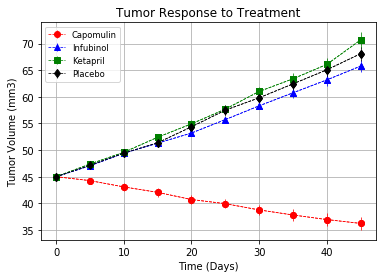

In [157]:
time = trial_data["Timepoint"].unique()
drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]
color_list = ["red","blue","green","black"]
marker_list = ["o","^","s","d"]

fig,ax = plt.subplots()

for drug,c,m in zip(drug_list,color_list,marker_list):
    mean = drug_tumor_res[drug].tolist()
    std_err = drug_tumor_res_stderr[drug].tolist()
    ax.errorbar(time, mean,yerr=std_err, color=c,label=drug,marker=m,ls="--",lw=.75)
    fig = plt.plot(time, mean, color=c, marker=m,ls="--",lw=.75)
    fig = plt.legend(loc="upper left",fontsize="small", fancybox=True)
    
plt.title("Tumor Response to Treatment")
plt.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

## Metastatic Response to Treatment

In [35]:
mean_metast_res = trial_data.groupby(["Drug","Timepoint"]).mean()
del mean_metast_res["Tumor Volume (mm3)"]
mean_metast_res.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [159]:
stderr_metast_res = trial_data.groupby(["Drug","Timepoint"]).sem()
stderr_metast_res = stderr_metast_res.drop(columns=["Mouse ID",
                                                    "Tumor Volume (mm3)"])
stderr_metast_res.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [38]:
drug_metast_res = mean_metast_res.pivot_table("Metastatic Sites","Timepoint","Drug")
drug_metast_res.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


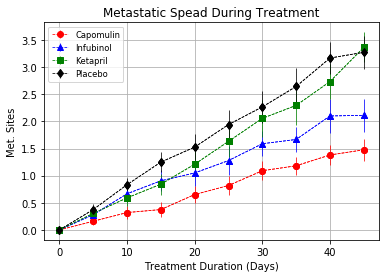

In [193]:
time = trial_data["Timepoint"].unique()
drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]
color_list = ["red","blue","green","black"]
marker_list = ["o","^","s","d"]

fig,ax = plt.subplots()

for drug,c,m in zip(drug_list,color_list,marker_list):
    mean = drug_metast_res[drug].tolist()
    list_of_lists = stderr_metast_res.loc[drug].values.tolist()
    std_err = [val for sublist in list_of_lists for val in sublist]
    ax.errorbar(time, mean,yerr=std_err, color=c,label=drug,marker=m,ls="--",lw=.75)
    fig = plt.plot(time, mean, color=c, marker=m,ls="--",lw=.75)
    fig = plt.legend(loc="upper left",fontsize="small", fancybox=True)
    
plt.title("Metastatic Spead During Treatment")
plt.grid()
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
plt.show()

## Survival Rates

In [187]:
mouse_count = trial_data.groupby(["Drug","Timepoint"]).count()
mouse_count = mouse_count.drop(columns = ["Tumor Volume (mm3)",
                                          "Metastatic Sites"])
mouse_count.reset_index(inplace = True)
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [188]:
survival = mouse_count.pivot_table("Mouse ID","Timepoint","Drug")
survival.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


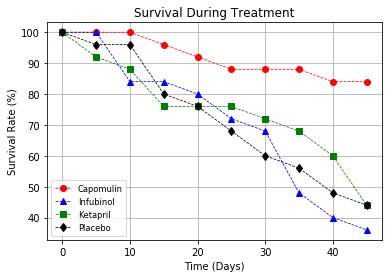

In [204]:
time = trial_data["Timepoint"].unique()
drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]
color_list = ["red","blue","green","black"]
marker_list = ["o","^","s","d"]

fig,ax = plt.subplots()

for drug,c,m in zip(drug_list,color_list,marker_list):
    rate = survival[drug]/survival[drug][0] * 100
    surv_percent = rate.tolist()
    fig = plt.plot(time, surv_percent, color=c, marker=m,ls="--",lw=.75, label=drug)
    fig = plt.legend(loc="bottom left",fontsize="small", fancybox=True)
    
plt.title("Survival During Treatment")
plt.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.show()

## Summary Bar Graph

In [92]:
perc_change = (drug_tumor_res.loc[45] / drug_tumor_res.loc[0] - 1) * 100
perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [98]:
tumor_size_change = pd.DataFrame(perc_change)
tumor_size_change = tumor_size_change.rename(columns = {0:"Percent Change"})
tumor_size_change["Drug Results"] = np.where(tumor_size_change["Percent Change"] <= 0, "Passed", "Failed")
tumor_size_change

,Percent Change,Drug Results
Drug,,
Capomulin,-19.475303,Passed
Ceftamin,42.516492,Failed
Infubinol,46.123472,Failed
Ketapril,57.028795,Failed
Naftisol,53.923347,Failed
Placebo,51.297960,Failed
Propriva,47.241175,Failed
Ramicane,-22.320900,Passed
Stelasyn,52.085134,Failed
